In [132]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from sklearn import datasets


In [133]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [134]:
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten pixels
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [135]:
import tensorflow as tf

# tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=784),
    tf.keras.layers.Dense(10, activation=tf.nn.leaky_relu, kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation=tf.nn.leaky_relu, kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)

Epoch 1/3
60000/60000 [==============================] - 151s 3ms/step - loss: 0.8689 - accuracy: 0.8079
Epoch 2/3
60000/60000 [==============================] - 146s 2ms/step - loss: 0.6883 - accuracy: 0.8568
Epoch 3/3
60000/60000 [==============================] - 151s 3ms/step - loss: 0.6519 - accuracy: 0.8641
313/313 - 1s - loss: 0.6234 - accuracy: 0.8756 - 672ms/epoch - 2ms/step

Test accuracy: 0.8755999803543091
313/313 [==============================] - 1s 2ms/step


In [136]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                7850      
                                                                 
 dense_25 (Dense)            (None, 5)                 55        
                                                                 
 dense_26 (Dense)            (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
# import tensorflow as tf

# # tf.random.set_seed(42)

# # custom constraint for non-negative weights
# class NonNegConstraint(tf.keras.constraints.Constraint):
#     def __call__(self, w):
#         w = tf.where(w < 0., tf.zeros_like(w), w)
#         return w

# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=784),
#     tf.keras.layers.Dense(10, activation='tanh', kernel_constraint=NonNegConstraint()),
#     tf.keras.layers.Dense(5, activation='relu', kernel_constraint=NonNegConstraint()),
#     tf.keras.layers.Dense(10, activation='softmax', kernel_constraint=NonNegConstraint())
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


# model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f'Test accuracy: {accuracy:.4f}')


In [138]:
import networkx as nx

weights = model.weights

G = nx.DiGraph()

pos = {}

col = 0
print(len(weights))
i = 0
z = 0
maxRows = 0
for z in range(len(weights)):
  maxRows = max(maxRows, weights[z].shape[0])
  z += 2

maxRows += 1

while i < len(weights): #gets weights associated with the a column
  w = weights[i]

  for sourceRow in range(w.shape[0]): # gets weights associated with a node
    source_node = 'l_' + str(sourceRow) + '_' + str(col)
    pos[source_node] = (col, maxRows//(w.shape[0] + 1) * (sourceRow + 1) * -5)

    for row in range(w.shape[1]):
      dest_node = 'l_' + str(row) + '_' + str(col+1)
      G.add_edge(source_node, dest_node, weight = w[sourceRow][row])
      pos[dest_node] = (col + 1, maxRows//(w.shape[1] + 1) * (row + 1) * -5)

  i += 2
  col += 1

6


In [139]:
# mapping = {}
# target_names = iris["target_names"]
# target_index = 0

# for node in G.nodes():
#     if node.endswith('_3'):
#         mapping[node] = node.replace(node, f'{target_names[target_index]}')
#         target_index += 1  # Move to the next target_name
# # Perform the renaming
# G = nx.relabel_nodes(G, mapping)

# print(G.nodes)

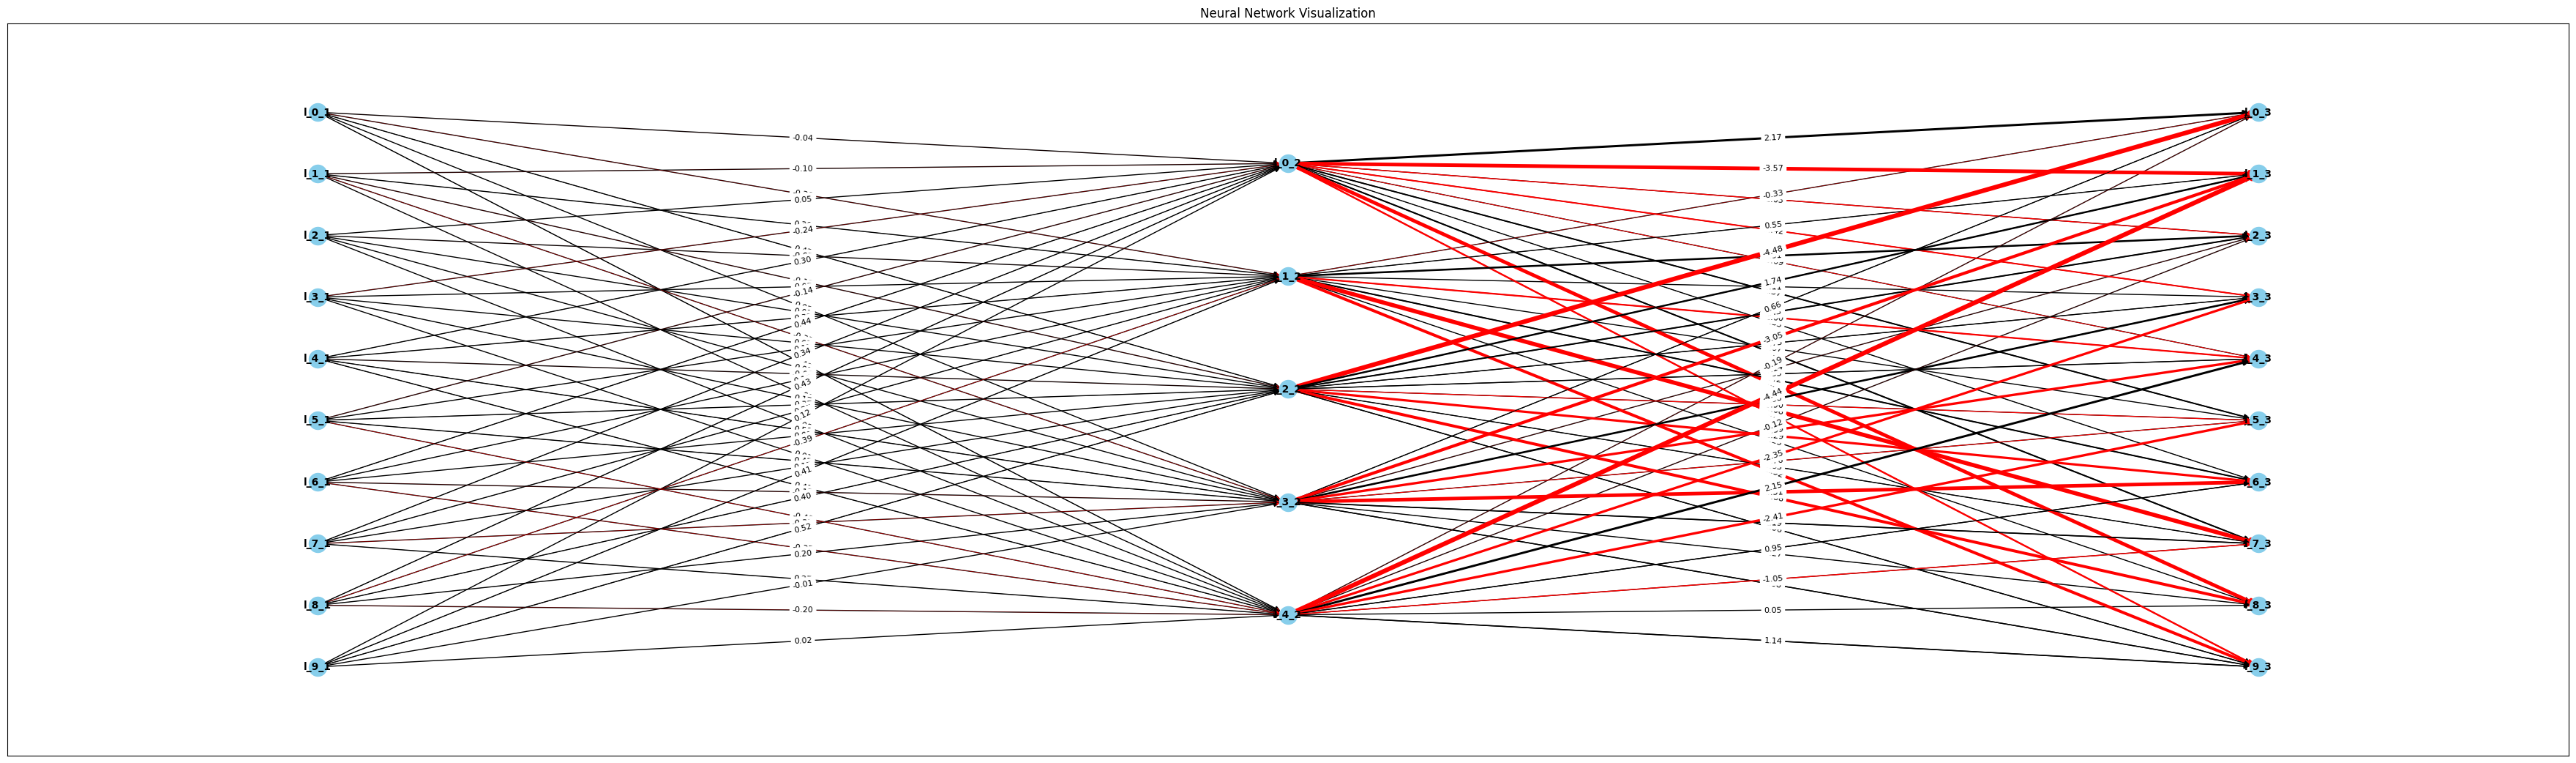

In [140]:
import matplotlib.pyplot as plt
import networkx as nx
import math
import matplotlib.pyplot as plt
import networkx as nx

# filter _0 nodes
nodes_to_exclude = [node for node in G.nodes() if node.endswith("_0")]
G_filtered = G.copy()
G_filtered.remove_nodes_from(nodes_to_exclude)

edge_colors = []
width = []
for u, v, d in G_filtered.edges(data=True):
    if d['weight'] > 0:
        edge_colors.append('black')
    else:
        edge_colors.append('red')
    width.append((d['weight']))

plt.figure(figsize=(35, 10))

nx.draw(G_filtered, pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

nx.draw_networkx_edges(G_filtered, pos=pos, edge_color=edge_colors, arrows=True, width=width)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title('Neural Network Visualization')
plt.axis('on')
plt.margins(0.1)

plt.show()


In [141]:
negativeCount = 0
negativeWeight = 0
positiveCount = 0
positiveWeight = 0
# for u, v, d in G.edges(data=True):
#   # if u.endswith("_"):
#   #   continue
#   if d["weight"] > 0:

#   else:



In [142]:
# weights = [abs(d['weight']) for u, v, d in G.edges(data=True)]
# min_abs_weight = min(weights)
# max_abs_weight = max(weights)

# # Step 2: Normalize and scale weights to spectrum from -50 to 50
# for u, v, d in G.edges(data=True):
#     original_weight = d['weight']

#     # Calculate normalized weight based on absolute range
#     if min_abs_weight != max_abs_weight:
#         normalized_weight = ((abs(original_weight) - min_abs_weight) / (max_abs_weight - min_abs_weight)) * 100 - 50
#     else:
#         normalized_weight = 0  # Handle case where min_abs_weight == max_abs_weight

#     # Scale the normalized weight to range from -50 to 50
#     scaled_weight = normalized_weight

#     # Preserve the sign of the original weight
#     if original_weight < 0:
#         scaled_weight *= -1  # Adjust sign if original weight is negative

#     # Update the edge weight with the scaled value
#     d['weight'] = scaled_weight

# # Print the updated graph with normalized and scaled weights
# print("Updated weights:")
# for u, v, d in G.edges(data=True):
#     print(f"Edge ({u}, {v}): {d['weight']}")

In [143]:
# print(min_abs_weight)
# print(max_abs_weight)

In [147]:
import plotly.graph_objects as go
import networkx as nx
import random
import math

source = []
target = []
weights_list = []
edges = G_filtered.edges(data=True)
edges = sorted(edges)
edge_colors = []
# print("Length of edges:", len(edges))
for u, v, d in edges:
  if u.endswith("_0"):
    continue
  source.append(u)
  target.append(v)
  value = d["weight"].numpy()
  value = d["weight"]
  if d["weight"] >= 0:
    edge_colors.append("black")
    positiveCount += 1
    positiveWeight += d["weight"].numpy()
  else:
    value *= -1
    edge_colors.append("red")
    negativeCount += 1
    negativeWeight += d["weight"].numpy()
    # print("Weight is", d["weight"])
  weights_list.append(value)

node_to_index = {node: i for i, node in enumerate(sorted(G_filtered.nodes))}
print(len(source), len(target), len(weights))
source_index = []
target_index = []


for val in source:
  source_index.append(node_to_index[val])

for val in target:
  target_index.append(node_to_index[val])

# print("Sources:", source_index)

# print("Targets:", target_index)

# print("Indexes:", node_to_index)
link_properties = {
    'source': source_index,
    'target': target_index,
    'value': weights_list,
    'color': edge_colors
}

node_properties = {
    'pad': 15,
    'thickness': 20,
    'line': dict(color="black", width=0.5),
    'label': sorted(G_filtered.nodes())
}

sankey_diagram = go.Sankey(node=node_properties, link=link_properties)

fig = go.Figure(data=[sankey_diagram])
fig.update_layout(title_text="Sankey Diagram for Neural Networks", font_size=10)
fig.show()


100 100 6


In [145]:
print("There are", negativeCount, "negatives with a total value of", negativeWeight, "and", positiveCount, "positives/more than 0 with a total value of", positiveWeight)

There are 42 negatives with a total value of -54.944657548330724 and 58 positives/more than 0 with a total value of 33.12676883419044
